In [132]:
# pyplot for plotting
import matplotlib.pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats
# import viz # curriculum viz example code
np.random.seed(123)

from env import host, username, password

# hint for exercises:
# you can feed more than one value into a cdf or a ppf
# use a list format[low_val, high_val]
# ex: some_distribution.cdf([4,7])



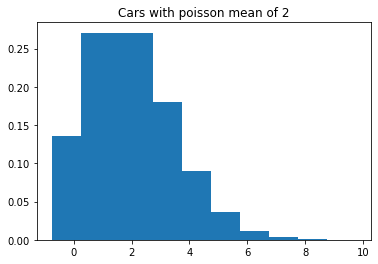

In [134]:
# Exercises
# For the following problems, use python to simulate the problem and calculate an experimental probability, 
# then compare that to the theoretical probability.

# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows
#  a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these 
# questions concerning the probability of cars waiting at the drive-up window.


cars = 50
cars = stats.poisson(2)
x = range(10)
y = cars.pmf(x)
plt.bar(x, y, width=1.5)
plt.title('Cars with poisson mean of 2')
plt.show()


In [135]:
# . What is the probability that no cars drive up in the noon hour?

stats.poisson(50).pmf(2)

2.410937309954894e-19

In [136]:
#. What is the probability that 3 or more cars come through the drive through?

stats.poisson(μ).sf(3)

0.14287653950145296

In [137]:
#. How likely is it that the drive through gets at least 1 car?

stats.poisson(μ).sf(0)

0.8646647167633873

3.4934560880854417

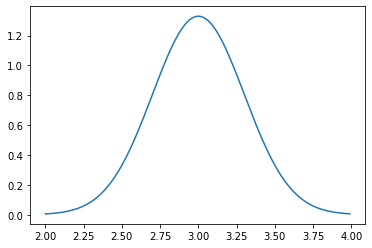

In [144]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and
# a standard deviation of .3. Calculate the following:

grades_dist = stats.norm(3.0, 0.3)
x = np.arange(2.0, 4.0, 0.01)
y = grades_dist.pdf(x)

plt.plot(x, y);

#. What grade point average is required to be in the top 5% of the graduating class?

grades_dist.isf(0.05)

In [119]:
#. What GPA constitutes the bottom 15% of the class?

grades_dist.ppf(0.15)


2.689069983151863

In [ ]:
#. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for 
# this scholarship?

In [120]:
# If I have a GPA of 3.5, what percentile am I in?
grades_dist.cdf(3.5)

0.9522096477271853

In [55]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and
# 97 click-throughs. How likely is it that this many people or more click through?

stats.binom(4326, 0.02).sf(97)


0.11781530585978471

In [56]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are 
# a probability rounded to the hundreths place. Looking to save time, you put down random probabilities
# as the answer to each question.

# .What is the probability that at least one of your first 60 answers is correct?

questions = 100
stats.poisson(questions).cdf(60)

1.0812218170244006e-05

In [59]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and,
# on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.

# How likely is it that the break area gets cleaned up each day? 

daily_visits = (0.9 * (3 *22) )
each_day = stats.binom(daily_visits, 0.03).pmf(1)
each_day


0.300868680133005

In [60]:
# How likely is it that it goes two dayswithout getting cleaned up? All week?

two_days= stats.binom(daily_visits, 0.03).pmf(2)
two_days

0.2717123338108376

In [62]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when
# your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?
#Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

number_of_people_mean = 15
number_of_people_std = 3 
# mean time= 15 * 2 minutes
lunch_time = stats.norm (number_of_people_mean, number_of_people_std).isf(15/60)
lunch_time


17.023469250588246

In [181]:
# 7. Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation.For the following questions, calculate the answer based on modeling the employees salaries with a
# normal distribution defined by the calculated mean and standard deviation then compare this answer to the 
# actual values present in the salaries dataset.


import env
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
    
salaries = pd.read_sql('SELECT * FROM salaries WHERE salaries.to_date > NOW()', url)
salaries.head()


,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [190]:
avg_salary = salaries.salary.mean()
std_dev = salaries.salary.std()

salary_dist = stats.norm(avg_salary, std_dev)


In [194]:
# (a)What percent of employees earn less than 60,0

salary_dist.cdf(60_000)


0.2705727041028802

In [197]:
# (b) What percent of employees earn more than 95,000?

salary_dist.sf(95_000)

0.09208819199804053

In [198]:
# (c) What percent of employees earn between 65,000 and 80,000?

salary_dist.cdf(80_000) - salary_dist.cdf(65_000)

0.3350605685446666

In [199]:
# (d) What do the top 5% of employees make?

salary_dist.isf(.05)

100484.64454102777